# Task 1                
Name : Sushant Yadav  
Domain : Data Science

# TITANIC SURVIVAL PREDICTION :  
- Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.
- The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.

**Important Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Importing the Dataset using pandas :**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Python_dataset/Titanic-Dataset.csv')

df = pd.DataFrame(data)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Survived status
# 0 for false it mean can't survive
#  1 for True it mean survive
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64


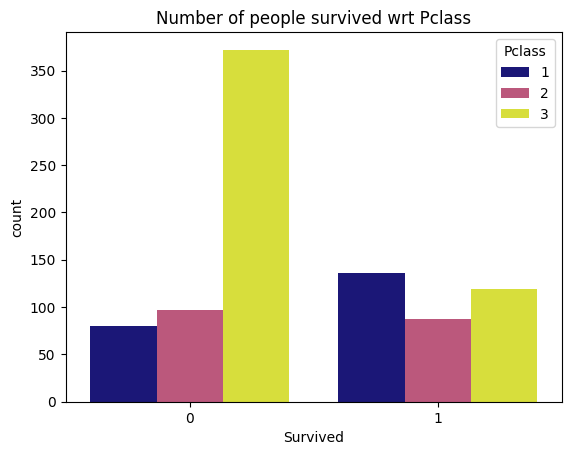

In [ ]:
# The count of survival with respect to pclass pasenger
var = df.groupby(['Pclass'])['Survived'].value_counts()
print(var)
sns.countplot(x=df["Survived"],hue=df["Pclass"],palette="plasma")
plt.title("Number of people survived wrt Pclass")
plt.show()

**Observation** :         


*   Most of the Passengers died were from 3rd Class
*   Most Survived passengers were from 1st Class



Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64


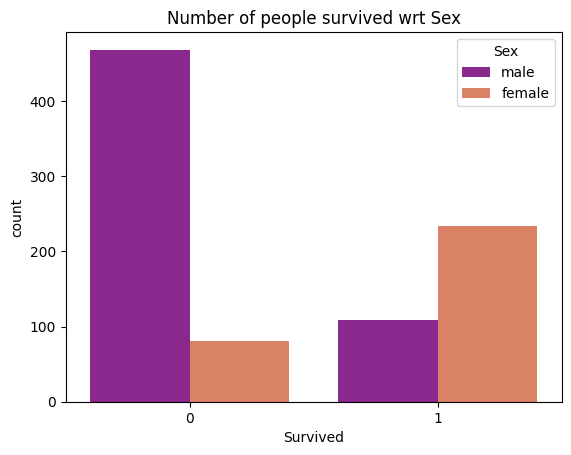

In [ ]:
# The count wrt to sex
var2 = df.groupby(["Sex"])['Survived'].value_counts()
print(var2)

sns.countplot(x=df["Survived"],hue=df["Sex"],palette="plasma")
plt.title("Number of people survived wrt Sex")
plt.show()

**Observation** :         


*   Chances of Survival for Females is less than Males

# Model Training :         

In [ ]:
# Use .loc to map 'female' to 0 and 'male' to 1
df.loc[df["Sex"] == "female", "Sex"] = 0
df.loc[df["Sex"] == "male", "Sex"] = 1

# Convert the "Sex" column to integer type
df["Sex"] = df["Sex"].astype(int)

In [ ]:
x = df[["Pclass","Sex"]]
y = df["Survived"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from logging import log
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=0)
log_reg.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Building machine learning model and training them
Model2 = KNeighborsClassifier()
Model2.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
# Evaluating the model to verify the accuray

print("Accuracy : ",Model2.score(x_test,y_test)*100)
print("Accuracy : ",Model2.score(x_train,y_train)*100)

Accuracy :  78.77094972067039
Accuracy :  78.65168539325843


In [ ]:
p = log_reg.predict(x_test)
print(p)

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [ ]:
print(y_test)

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: int64


In [ ]:
def predict_survival(pclass, sex):
  input_data = pd.DataFrame({'Pclass': [pclass], 'Sex': [sex]})
  prediction = log_reg.predict(input_data)
  if prediction == 0:
    return "Did not survive"
  else:
    return "Survived"

result = predict_survival(1, 0)
print(result)

Survived


**Conclusion** :


*   The Models Predicts the Survial of Passengers of Titanic based on their Class of Travel and their Gender.


